In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

# Using the openmmawsem pdb.

In [11]:
input_pdb_filename = "/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/setups/1py6/1py6-openmmawsem"

structure = parse_pdb(input_pdb_filename)
res_list = get_res_list(structure)
neighbor_list = get_neighbor_list(structure)
sequence = get_sequence_from_structure(structure)

/Users/weilu/anaconda/lib/python3.6/site-packages/Bio/PDB/Polypeptide.py:328: UserWarning: Assuming residue NGP is an unknown modified amino acid
  "amino acid" % residue.get_resname())
/Users/weilu/anaconda/lib/python3.6/site-packages/Bio/PDB/Polypeptide.py:328: UserWarning: Assuming residue IPR is an unknown modified amino acid
  "amino acid" % residue.get_resname())


In [14]:
all_atoms = list(structure.get_atoms())

In [5]:
frag_table_file = "/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/setups/1py6/ha.npy"
frag_table, interaction_list, interaction_pair_to_bond_index = np.load(frag_table_file, allow_pickle=True)

In [9]:
frag_table.shape

(4794, 500)

In [28]:



k_fm = 0.01   # 0.04184
frag_table_rmin = 0
frag_table_rmax = 5  # in nm
frag_table_dr = 0.01
r_table_size = int((frag_table_rmax - frag_table_rmin)/frag_table_dr)  # 500 here.
max_r_index_1 = r_table_size - 2

energy = 0
for (i, j) in interaction_list:
    index = interaction_pair_to_bond_index[(i,j)]
    r = (all_atoms[i] - all_atoms[j]) / 10    # in unit of nm
    r_index_1=int(min(max_r_index_1, np.floor(r/frag_table_dr)))
    r_index_2=r_index_1+1
    r_1=frag_table_rmin+frag_table_dr*r_index_1
    r_2=frag_table_rmin+frag_table_dr*r_index_2
    v1=frag_table[index, r_index_1]
    v2=frag_table[index, r_index_2]

    energy += k_fm*((v2-v1)*r+v1*r_2-v2*r_1)/(r_2-r_1)

In [29]:
energy

1071.0001428480382

In [37]:
energy = 0
for (i, j) in interaction_list:
    if i in range(590, 720):
        index = interaction_pair_to_bond_index[(i,j)]
        r = (all_atoms[i] - all_atoms[j]) / 10    # in unit of nm
        r_index_1=int(min(max_r_index_1, np.floor(r/frag_table_dr)))
        r_index_2=r_index_1+1
        r_1=frag_table_rmin+frag_table_dr*r_index_1
        r_2=frag_table_rmin+frag_table_dr*r_index_2
        v1=frag_table[index, r_index_1]
        v2=frag_table[index, r_index_2]

        energy += k_fm*((v2-v1)*r+v1*r_2-v2*r_1)/(r_2-r_1)
energy

66.25167394019772

In [ ]:
590, 720

In [38]:
energy = 0
for (i, j) in interaction_list:
    if i in range(460, 590):
        index = interaction_pair_to_bond_index[(i,j)]
        r = (all_atoms[i] - all_atoms[j]) / 10    # in unit of nm
        r_index_1=int(min(max_r_index_1, np.floor(r/frag_table_dr)))
        r_index_2=r_index_1+1
        r_1=frag_table_rmin+frag_table_dr*r_index_1
        r_2=frag_table_rmin+frag_table_dr*r_index_2
        v1=frag_table[index, r_index_1]
        v2=frag_table[index, r_index_2]

        energy += k_fm*((v2-v1)*r+v1*r_2-v2*r_1)/(r_2-r_1)
energy

133.29152124096757

In [30]:
20*0.01*4794

958.8000000000001

In [31]:
frag_table.max()

101.55236359252825

(array([2.170933e+06, 1.173400e+05, 5.532500e+04, 2.838400e+04,
        1.427500e+04, 6.841000e+03, 2.900000e+03, 7.520000e+02,
        1.690000e+02, 8.100000e+01]),
 array([2.02524932e-260, 1.01552364e+001, 2.03104727e+001, 3.04657091e+001,
        4.06209454e+001, 5.07761818e+001, 6.09314182e+001, 7.10866545e+001,
        8.12418909e+001, 9.13971272e+001, 1.01552364e+002]),
 <a list of 10 Patch objects>)

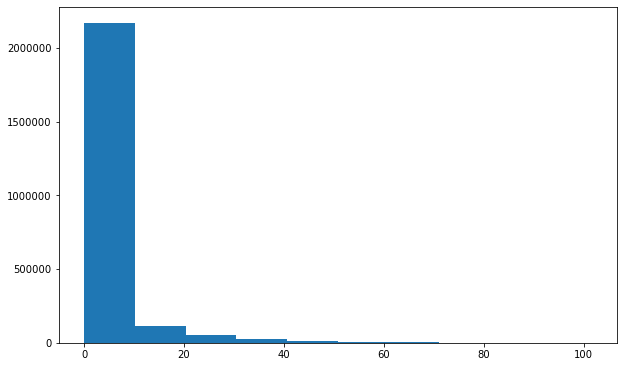

In [34]:
plt.hist(frag_table.flatten())

In [26]:
r_index_1

126.0

In [ ]:
    max_r_index_1 = r_table_size - 2
    fm = CustomCompoundBondForce(2, f"-{k_fm}*((v2-v1)*r+v1*r_2-v2*r_1)/(r_2-r_1); \
                                v1=frag_table(index, r_index_1);\
                                v2=frag_table(index, r_index_2);\
                                r_1={frag_table_rmin}+{frag_table_dr}*r_index_1;\
                                r_2={frag_table_rmin}+{frag_table_dr}*r_index_2;\
                                r_index_2=r_index_1+1;\
                                r_index_1=min({max_r_index_1}, floor(r/{frag_table_dr}));\
                                r=distance(p1, p2);")
    for (i, j) in interaction_list:
        if caOnly and ((i not in oa.ca) or (j not in oa.ca)):
            continue
        fm.addBond([i, j], [interaction_pair_to_bond_index[(i,j)]])

In [ ]:


def fragment_memory_term(oa, k_fm=0.04184, frag_file_list_file="./frag.mem", npy_frag_table="./frag_table.npy",
                    min_seq_sep=3, max_seq_sep=9, fm_well_width=0.1, UseSavedFragTable=True, caOnly=False, forceGroup=23):
    # 0.8368 = 0.01 * 4.184 # in kJ/mol, converted from default value in LAMMPS AWSEM
    k_fm *= oa.k_awsem
    frag_table_rmin = 0
    frag_table_rmax = 5  # in nm
    frag_table_dr = 0.01
    r_array = np.arange(frag_table_rmin, frag_table_rmax, frag_table_dr)
    number_of_atoms = oa.natoms
    r_table_size = int((frag_table_rmax - frag_table_rmin)/frag_table_dr)  # 500 here.
    raw_frag_table = np.zeros((number_of_atoms, 6*(1+max_seq_sep), r_table_size))
    data_dic = {}
    for i in range(oa.natoms):
        if i in oa.ca:
            res_id = oa.resi[i]    # oa.resi start with 0, but pdb residue id start with 1
            data_dic[("CA", 1+int(res_id))] = i
        if i in oa.cb:
            res_id = oa.resi[i]
            data_dic[("CB", 1+int(res_id))] = i
    # print(oa.res_type)
    # print(oa.resi)
    # print(data_dic)
    frag_location_pre = os.path.dirname(frag_file_list_file)
    # frag_file_list_file = frag_location_pre + "frags.mem"
    # frag_table_file = frag_location_pre + "frag_table.npy"
    frag_table_file = npy_frag_table

    if os.path.isfile(frag_table_file) and UseSavedFragTable:
        print(f"Reading Fragment table from {frag_table_file}.")
        frag_table, interaction_list, interaction_pair_to_bond_index = np.load(frag_table_file, allow_pickle=True)
        print(f"Fragment table loaded, number of bonds: {len(interaction_list)}")
        frag_file_list = []
    else:
        print(f"Loading Fragment files(Gro files)")
        frag_file_list = pd.read_csv(frag_file_list_file, skiprows=4, sep="\s+", names=["location", "target_start", "fragment_start", "frag_len", "weight"])
        interaction_list = set()
    for frag_index in range(len(frag_file_list)):
        location = frag_file_list["location"].iloc[frag_index]
        frag_name = os.path.join(frag_location_pre, location)
        frag_len = frag_file_list["frag_len"].iloc[frag_index]
        weight = frag_file_list["weight"].iloc[frag_index]
        target_start = frag_file_list["target_start"].iloc[frag_index]  # residue id
        fragment_start = frag_file_list["fragment_start"].iloc[frag_index]  # residue id
        frag = pd.read_csv(frag_name, skiprows=2, sep="\s+", header=None, names=["Res_id", "Res", "Type", "i", "x", "y", "z"])
        frag = frag.query(f"Res_id >= {fragment_start} and Res_id < {fragment_start+frag_len} and (Type == 'CA' or Type == 'CB')")
        w_m = weight
        gamma_ij = 1
        f = frag.values
        for i in range(len(frag)):
            for j in range(i, len(frag)):
                res_id_i = frag["Res_id"].iloc[i]
                res_id_j = frag["Res_id"].iloc[j]
                target_res_id_i = frag["Res_id"].iloc[i] - fragment_start + target_start
                target_res_id_j = frag["Res_id"].iloc[j] - fragment_start + target_start
                seq_sep = res_id_j - res_id_i
                if seq_sep > max_seq_sep:
                    continue
                if seq_sep < min_seq_sep:
                    continue
                try:
                    i_type = frag["Type"].iloc[i]
                    j_type = frag["Type"].iloc[j]
                    correspond_target_i = data_dic[(i_type, int(target_res_id_i))]
                    correspond_target_j = data_dic[(j_type, int(target_res_id_j))]
                    correspond_target_i = int(correspond_target_i)
                    correspond_target_j = int(correspond_target_j)
                except Exception as e:
                    continue

                fi_x = f[i][4]
                fi_y = f[i][5]
                fi_z = f[i][6]

                fj_x = f[j][4]
                fj_y = f[j][5]
                fj_z = f[j][6]
                # print("----", fi_x, fi_y, fi_z, fj_x, fj_y, fj_z)
                sigma_ij = fm_well_width*seq_sep**0.15
                rm = ((fi_x-fj_x)**2 + (fi_y-fj_y)**2 + (fi_z-fj_z)**2)**0.5

                i_j_sep = int(correspond_target_j - correspond_target_i)

                raw_frag_table[correspond_target_i][i_j_sep] += w_m*gamma_ij*np.exp((r_array-rm)**2/(-2.0*sigma_ij**2))
                interaction_list.add((correspond_target_i, correspond_target_j))
    if (not os.path.isfile(frag_table_file)) or (not UseSavedFragTable):
        # Reduce memory usage.
        print("Saving fragment table as npy file to speed up future calculation.")
        number_of_bonds = len(interaction_list)
        frag_table = np.zeros((number_of_bonds, r_table_size))
        interaction_pair_to_bond_index = {}
        for index, (i, j) in enumerate(interaction_list):
            ij_sep = j - i
            assert(ij_sep > 0)
            frag_table[index] = raw_frag_table[i][ij_sep]
            interaction_pair_to_bond_index[(i,j)] = index
        np.save(frag_table_file, (frag_table, interaction_list, interaction_pair_to_bond_index))
        print(f"All gro files information have been stored in the {frag_table_file}. \
            \nYou might want to set the 'UseSavedFragTable'=True to speed up the loading next time. \
            \nBut be sure to remove the .npy file if you modify the .mem file. otherwise it will keep using the old frag memeory.")
    # fm = CustomNonbondedForce(f"-k_fm*((v2-v1)*r+v1*r_2-v2*r_1)/(r_2-r_1); \
    #                             v1=frag_table(index_smaller, sep, r_index_1);\
    #                             v2=frag_table(index_smaller, sep, r_index_2);\
    #                             index_smaller=min(index1,index2);\
    #                             sep=abs(index1-index2);\
    #                             r_1=frag_table_rmin+frag_table_dr*r_index_1;\
    #                             r_2=frag_table_rmin+frag_table_dr*r_index_2;\
    #                             r_index_2=r_index_1+1;\
    #                             r_index_1=floor(r/frag_table_dr);")
    # for i in range(oa.natoms):
    #     fm.addParticle([i])

    # # add interaction that are cutoff away
    # # print(sorted(interaction_list))
    # for (i, j) in interaction_list:
    #     fm.addInteractionGroup([i], [j])
    # # add per-particle parameters
    # fm.addPerParticleParameter("index")

    # for edge case, that r > frag_table_rmax
    max_r_index_1 = r_table_size - 2
    fm = CustomCompoundBondForce(2, f"-{k_fm}*((v2-v1)*r+v1*r_2-v2*r_1)/(r_2-r_1); \
                                v1=frag_table(index, r_index_1);\
                                v2=frag_table(index, r_index_2);\
                                r_1={frag_table_rmin}+{frag_table_dr}*r_index_1;\
                                r_2={frag_table_rmin}+{frag_table_dr}*r_index_2;\
                                r_index_2=r_index_1+1;\
                                r_index_1=min({max_r_index_1}, floor(r/{frag_table_dr}));\
                                r=distance(p1, p2);")
    for (i, j) in interaction_list:
        if caOnly and ((i not in oa.ca) or (j not in oa.ca)):
            continue
        fm.addBond([i, j], [interaction_pair_to_bond_index[(i,j)]])

    fm.addPerBondParameter("index")

    fm.addTabulatedFunction("frag_table",
            Discrete2DFunction(len(interaction_list), r_table_size, frag_table.T.flatten()))


    fm.setForceGroup(forceGroup)
    return fm
